In [62]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [64]:
#cleaning
data = pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
data["Total Tests"]=data["Total Tests"].fillna(data["Total Tests"].mean(),inplace=False)
data["Total Cases"]=data["Total Cases"].fillna(data["Total Cases"].mean(),inplace=False)
data["Total Deaths"]=data["Total Deaths"].fillna(data["Total Deaths"].mean(),inplace=False)
data["Total Recovered"]=data["Total Recovered"].fillna(data["Total Recovered"].mean(),inplace=False)
data["Serious or Critical"]=data["Serious or Critical"].fillna(data["Serious or Critical"].mean(),inplace=False)
data["Active Cases"]=data["Active Cases"].fillna(data["Active Cases"].mean(),inplace=False)
data.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [65]:
#List of all countries in dataset
l=[]
def research(x,l):
    i=0
    while i<len(l) and l[i]!=x:
        i=i+1
    if i<len(l):
        return 1
    else:
        return 0
for i in data["Country"]:
    if research(i,l)==0:
        l.append(i)
l

['USA',
 'Russia',
 'Spain',
 'Brazil',
 'UK',
 'Italy',
 'France',
 'Germany',
 'Turkey',
 'Iran',
 'India',
 'Peru',
 'China',
 'Canada',
 'Saudi Arabia',
 'Belgium',
 'Mexico',
 'Chile',
 'Netherlands',
 'Pakistan',
 'Qatar',
 'Ecuador',
 'Switzerland',
 'Belarus',
 'Sweden',
 'Portugal',
 'Singapore',
 'Ireland',
 'UAE',
 'Bangladesh',
 'Poland',
 'Ukraine',
 'Indonesia',
 'Romania',
 'Israel',
 'South Africa',
 'Japan',
 'Colombia',
 'Austria',
 'Kuwait',
 'Egypt',
 'Dominican Republic',
 'Philippines',
 'S. Korea',
 'Denmark',
 'Serbia',
 'Panama',
 'Czechia',
 'Argentina',
 'Norway',
 'Algeria',
 'Bahrain',
 'Afghanistan',
 'Australia',
 'Morocco',
 'Malaysia',
 'Kazakhstan',
 'Finland',
 'Nigeria',
 'Moldova',
 'Ghana',
 'Oman',
 'Armenia',
 'Bolivia',
 'Luxembourg',
 'Iraq',
 'Hungary',
 'Cameroon',
 'Azerbaijan',
 'Thailand',
 'Greece',
 'Guinea',
 'Uzbekistan',
 'Honduras',
 'Sudan',
 'Senegal',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Ivory Coast',
 'Guatemala'

In [78]:
#Choosing a country to work on and putting it in a dataframe of its own (Choose any other country from the list l)
country_name = 'USA'

country_df = data.loc[data['Country'] == country_name, :].reset_index(drop=True)
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0
5,2020-04-23,USA,330774664,4696704.0,880204.0,49845.0,85922.0,14997.0,744437.0
6,2020-04-24,USA,330774664,5015602.0,925038.0,52185.0,110432.0,15097.0,762421.0
7,2020-04-25,USA,330774664,5279237.0,960651.0,54256.0,118162.0,15110.0,788233.0
8,2020-04-26,USA,330774664,5470464.0,987160.0,55413.0,118781.0,15143.0,812966.0
9,2020-04-27,USA,330774664,5696928.0,1010356.0,56797.0,138990.0,14186.0,814569.0


In [67]:
#Choosing a date to work on and putting it in a dataframe of its own
selected_date = datetime.strptime('18/05/2020', '%d/%m/%Y')

selected_date_df = data.loc[data['Date'] == selected_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
selected_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,1.230074e+07,1550294.0,91981.000000,356383.000000,16868.00000,1.101930e+06
1,2020-05-18,Russia,145927292,7.147014e+06,290678.0,2722.000000,70209.000000,2300.00000,2.177470e+05
2,2020-05-18,Spain,46752703,3.037840e+06,278188.0,27709.000000,196958.000000,1152.00000,5.352100e+04
3,2020-05-18,Brazil,212380932,7.352240e+05,255368.0,16853.000000,100459.000000,8318.00000,1.380560e+05
4,2020-05-18,UK,67844241,2.682716e+06,246406.0,34796.000000,5855.424185,1559.00000,9.964142e+03
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.000000e+00
209,2020-05-18,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.000000e+00
210,2020-05-18,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.000000e+00
211,2020-05-18,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.000000e+00


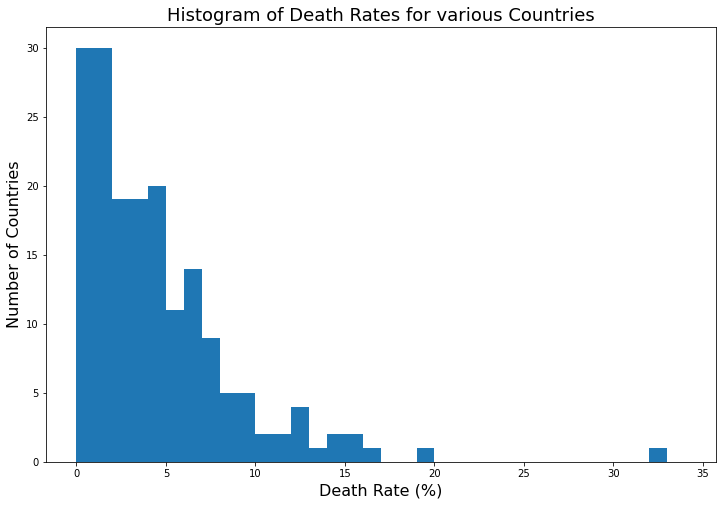

In [68]:
#Adding a new feature to calculate the death rate in the given date around the world
selected_date_df['Case Fatality Ratio'] = selected_date_df['Total Deaths'] / selected_date_df['Total Cases']

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(selected_date_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

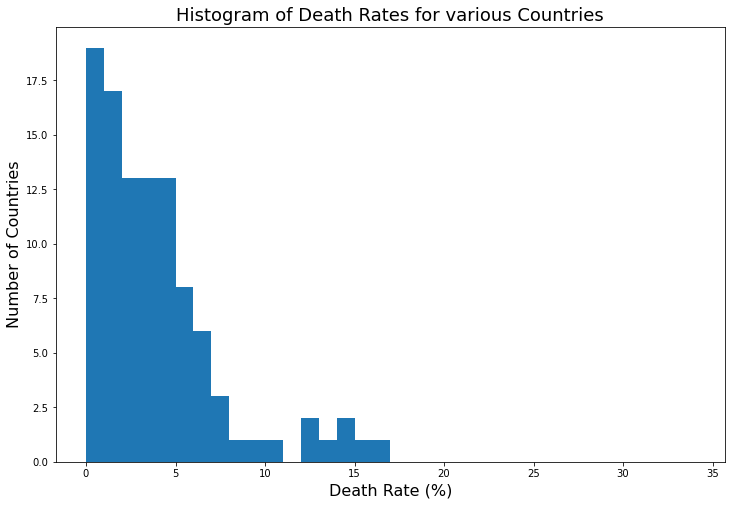

In [69]:
#Showing the death rate for the countries who are greatly affected (over 1000 cases in  a day)
min_number_of_cases = 1000

greatly_affected_df = selected_date_df.loc[selected_date_df['Total Cases'] > min_number_of_cases,:]

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(greatly_affected_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

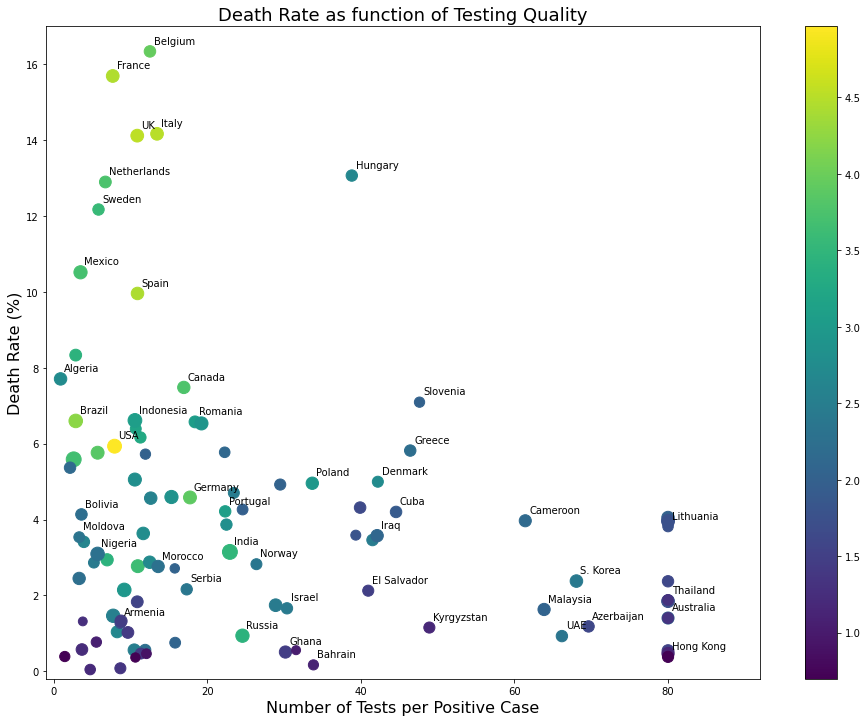

In [70]:
selected_date_df['Num Tests per Positive Case'] = selected_date_df['Total Tests'] / selected_date_df['Total Cases']

min_number_of_cases = 1000
greatly_affected_df = selected_date_df.loc[selected_date_df['Total Cases'] > min_number_of_cases,:]
#Setting a limit
x_axis_limit = 80

death_rate_percent = 100 * np.array(greatly_affected_df['Case Fatality Ratio'])
num_test_per_positive = np.array(greatly_affected_df['Num Tests per Positive Case'])
num_test_per_positive[num_test_per_positive > x_axis_limit] = x_axis_limit
total_num_deaths = np.array(greatly_affected_df['Total Deaths'])
population = np.array(greatly_affected_df['Population'])


#Showing the relation between Number of Tests per Positive Case and Death Rates in different countries
plt.figure(figsize=(16,12))
plt.scatter(x=num_test_per_positive, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate (%)', fontsize=16)
plt.xlabel('Number of Tests per Positive Case', fontsize=16)
plt.title('Death Rate as function of Testing Quality', fontsize=18)
plt.xlim(-1, x_axis_limit + 12)
plt.ylim(-0.2,17)

# plot on top of the figure the names of the

countries_to_display = ['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France', 
                        'Germany', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']

for country_name in countries_to_display:
    country_index = greatly_affected_df.index[greatly_affected_df['Country'] == country_name]
    plt.text(x=num_test_per_positive[country_index] + 0.5,
             y=death_rate_percent[country_index] + 0.2,
             s=country_name, fontsize=10)
plt.show()

In [74]:
#Seeing a stong coorelation between Total Cases and Total Deaths i decided to make a linear regression for x=Total Cases and y=Total Deaths
x=country_df["Total Cases"].values[:,np.newaxis]
y=country_df["Total Deaths"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 
MSE=mean_squared_error(y_test,predicted)
R2=metrics.r2_score(y_test,predicted)
print("MSE:", MSE)
print("R squared:", R2)
#R2 and MSE are optimal

MSE: 353103.26855740073
R squared: 0.9982407858089928


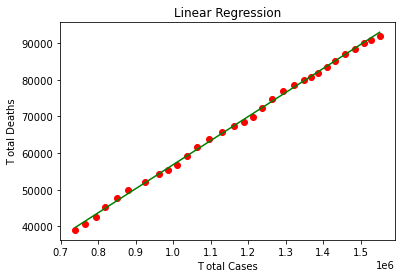

In [75]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("T otal Deaths")
plt.xlabel("T otal Cases")
plt.plot(x,model.predict(x),color="g")
plt.show()

In [73]:
#Original Dataframe
data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0
1,2020-04-18,Russia,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0
2,2020-04-18,Spain,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0
3,2020-04-18,Brazil,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0
4,2020-04-18,UK,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6599,2020-05-18,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6600,2020-05-18,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0
6601,2020-05-18,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0


In [76]:
#Country dataframe
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0
5,2020-04-23,USA,330774664,4696704.0,880204.0,49845.0,85922.0,14997.0,744437.0
6,2020-04-24,USA,330774664,5015602.0,925038.0,52185.0,110432.0,15097.0,762421.0
7,2020-04-25,USA,330774664,5279237.0,960651.0,54256.0,118162.0,15110.0,788233.0
8,2020-04-26,USA,330774664,5470464.0,987160.0,55413.0,118781.0,15143.0,812966.0
9,2020-04-27,USA,330774664,5696928.0,1010356.0,56797.0,138990.0,14186.0,814569.0


In [77]:
#Date dataframe
selected_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
0,2020-05-18,USA,330774664,1.230074e+07,1550294.0,91981.000000,356383.000000,16868.00000,1.101930e+06,0.059331,7.934459
1,2020-05-18,Russia,145927292,7.147014e+06,290678.0,2722.000000,70209.000000,2300.00000,2.177470e+05,0.009364,24.587392
2,2020-05-18,Spain,46752703,3.037840e+06,278188.0,27709.000000,196958.000000,1152.00000,5.352100e+04,0.099605,10.920097
3,2020-05-18,Brazil,212380932,7.352240e+05,255368.0,16853.000000,100459.000000,8318.00000,1.380560e+05,0.065995,2.879076
4,2020-05-18,UK,67844241,2.682716e+06,246406.0,34796.000000,5855.424185,1559.00000,9.964142e+03,0.141214,10.887381
...,...,...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.000000e+00,236.042016,36120.860218
209,2020-05-18,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.000000e+00,236.042016,36120.860218
210,2020-05-18,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.000000e+00,472.084032,72241.720436
211,2020-05-18,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.000000e+00,1416.252096,216725.161308
